In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

sns.set()

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [71]:
newly_confirmed_cases_daily_data = pd.read_csv(
    "../../data/newly_confirmed_cases_daily.csv", parse_dates=["date"]
)
summary_by_date_data = pd.read_csv(
    "../../data/summary_by_date.csv", parse_dates=["date"]
)
deaths_cumulative_daily_data = pd.read_csv(
    "../../data/number_of_deaths_daily.csv", parse_dates=["date"]
)

In [100]:
# 'date'列を datetime 型に変換
newly_confirmed_cases_daily_data["date"] = pd.to_datetime(
    newly_confirmed_cases_daily_data["date"]
)
summary_by_date_data["date"] = pd.to_datetime(summary_by_date_data["date"])

# 'date'列を基準にして結合
merged_data = pd.merge(
    newly_confirmed_cases_daily_data[["date", "ALL"]],
    deaths_cumulative_daily_data[["date", "total_deaths"]],
    on="date",
    how="left",
)

merged_data = pd.merge(
    merged_data,
    summary_by_date_data,
    on="date",
    how="left",
)

# DTypePromotionError: The DType <class 'numpy.dtypes.DateTime64DType'> could not be promoted by <class 'numpy.dtypes.Int64DType'>. This means that no common DType exists for the given inputs. For example they cannot be stored in a single array unless the dtype is `object`. The full list of DTypes is: (<class 'numpy.dtypes.DateTime64DType'>, <class 'numpy.dtypes.Int64DType'>)
# というエラーが出たので、以下のように修正
merged_data["date"] = pd.to_datetime(merged_data["date"])


sum_column = (
    merged_data["count_first_shot_general"]
    + merged_data["count_second_shot_general"]
    + merged_data["count_third_shot_general"]
    + merged_data["count_fourth_shot_general"]
    + merged_data["count_fifth_shot_general"]
    + merged_data["count_sixth_shot_general"]
    + merged_data["count_seventh_shot_general"]
)
sum_column_wo_deceased = (
    merged_data["count_first_shot_general_wo_deceased"]
    + merged_data["count_second_shot_general_wo_deceased"]
    + merged_data["count_third_shot_general_wo_deceased"]
    + merged_data["count_fourth_shot_general_wo_deceased"]
    + merged_data["count_fifth_shot_general_wo_deceased"]
    + merged_data["count_sixth_shot_general_wo_deceased"]
    + merged_data["count_seventh_shot_general_wo_deceased"]
)


# 新しい列として追加
merged_data["total_shot"] = sum_column
merged_data["total_wo_deceased"] = sum_column_wo_deceased

# 欠損値を 0 に置換
# merged_data = merged_data.fillna(0)
merged_data = merged_data.dropna()

# 標準化
numeric_columns = merged_data.select_dtypes(include=["int64", "float64"]).columns
merged_data[numeric_columns] = StandardScaler().fit_transform(
    merged_data[numeric_columns]
)

# 結合結果を表示
merged_data

,date,ALL,total_deaths,count_first_shot_general,count_second_shot_general,count_third_shot_general,count_fourth_shot_general,count_fifth_shot_general,count_sixth_shot_general,count_seventh_shot_general,count_first_shot_general_wo_deceased,count_second_shot_general_wo_deceased,count_third_shot_general_wo_deceased,count_fourth_shot_general_wo_deceased,count_fifth_shot_general_wo_deceased,count_sixth_shot_general_wo_deceased,count_seventh_shot_general_wo_deceased,total_shot,total_wo_deceased
452,2021-04-12,-0.731853,-0.617881,-0.512820,-0.533711,-0.471749,-0.502106,-0.332132,-0.036370,0.0,-0.517004,-0.532999,-0.474009,-0.503935,-0.333267,-0.036370,0.0,-1.089527,-1.095230
453,2021-04-13,-0.708123,-0.433289,-0.514421,-0.533711,-0.471749,-0.502106,-0.332132,-0.036370,0.0,-0.519353,-0.532999,-0.474009,-0.503935,-0.333267,-0.036370,0.0,-1.090401,-1.096508
454,2021-04-14,-0.693073,-0.576860,-0.510316,-0.533711,-0.471749,-0.502106,-0.332132,-0.036370,0.0,-0.514503,-0.532999,-0.474009,-0.503935,-0.333267,-0.036370,0.0,-1.088161,-1.093869
455,2021-04-15,-0.688418,-0.474309,-0.495604,-0.533711,-0.471749,-0.502106,-0.332132,-0.036370,0.0,-0.501606,-0.532999,-0.474009,-0.503935,-0.333267,-0.036370,0.0,-1.080133,-1.086850
456,2021-04-16,-0.689240,-0.402523,-0.487394,-0.533711,-0.471749,-0.502106,-0.332132,-0.036370,0.0,-0.491457,-0.532999,-0.474009,-0.503935,-0.333267,-0.036370,0.0,-1.075653,-1.081326
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1204,2023-05-04,-0.640485,-0.710177,-0.532162,-0.533579,-0.470701,-0.499454,-0.330762,-0.036370,0.0,-0.531816,-0.532862,-0.472928,-0.501212,-0.331869,-0.036370,0.0,-1.098151,-1.101295
1205,2023-05-05,-0.666910,-0.740942,-0.532088,-0.533418,-0.470086,-0.498112,-0.329835,-0.036370,0.0,-0.531739,-0.532695,-0.472294,-0.499834,-0.330923,-0.036370,0.0,-1.096973,-1.100078
1206,2023-05-06,-0.658790,-0.710177,-0.531009,-0.531105,-0.457240,-0.460101,-0.315415,-0.036370,0.0,-0.530621,-0.530301,-0.459043,-0.460814,-0.316208,-0.036370,0.0,-1.071092,-1.073330
1207,2023-05-07,-0.517267,-0.781963,-0.532002,-0.533260,-0.468517,-0.494669,-0.328580,-0.036370,0.0,-0.531650,-0.532533,-0.470676,-0.496300,-0.329642,-0.036370,0.0,-1.094458,-1.097478


従属変数と独立変数(SAT)を定義

In [101]:
y = merged_data["ALL"]
x1 = merged_data["total_shot"]
# x2 = merged_data["total_wo_deceased"]

P値を確認

In [102]:
x = sm.add_constant(x1)
results = sm.OLS(y, x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    ALL   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     4.680
Date:                Tue, 09 Jan 2024   Prob (F-statistic):             0.0308
Time:                        21:03:23   Log-Likelihood:                -1071.8
No. Observations:                 757   AIC:                             2148.
Df Residuals:                     755   BIC:                             2157.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.816e-18      0.036  -1.05e-16      1.000      -0.071       0.071
total_shot     0.0785      0.036      2.163      0.031       0.007       0.150
==============================================================================
Omnibus:                      257.441   Durbin-Watson:                   0.117
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              652.218
Skew:                           1.796   Prob(JB):                    2.36e-142
Kurtosis:                       5.790   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

散布図を描画

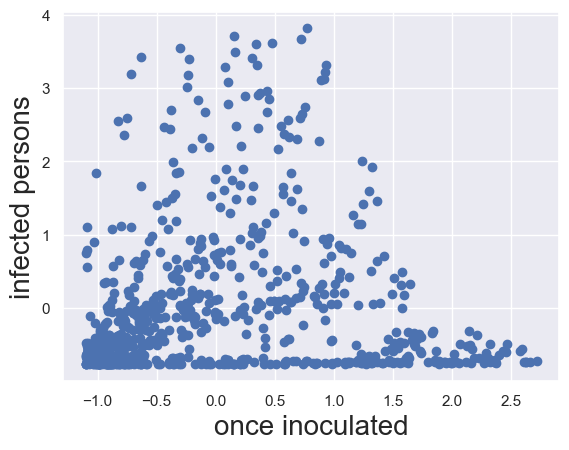

In [103]:
plt.scatter(x1, y, color="C0")
plt.xlabel("once inoculated", fontsize=20)
plt.ylabel("infected persons", fontsize=20)
plt.show()

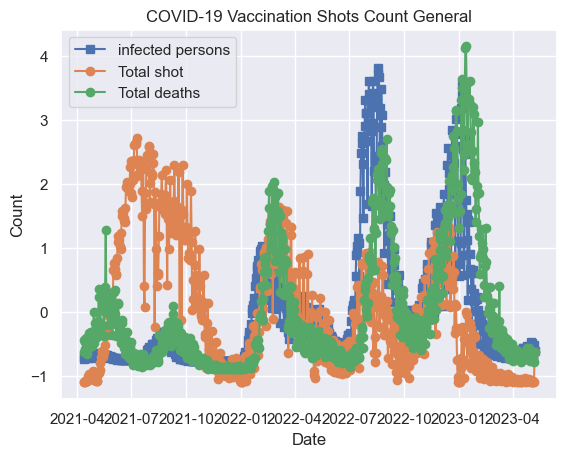

In [107]:
# 各変数を一つのグラフにまとめてプロット
plt.plot(merged_data["date"], merged_data["ALL"], label="infected persons", marker="s")
plt.plot(
    merged_data["date"],
    merged_data["total_shot"],
    label="Total shot",
    marker="o",
)
plt.plot(
    merged_data["date"],
    merged_data["total_deaths"],
    label="Total deaths",
    marker="o",
)

# データのラベル、タイトル、凡例などの設定
plt.xlabel("Date")
plt.ylabel("Count")
plt.title("COVID-19 Vaccination Shots Count General")

# 凡例を表示
plt.legend()

# グリッドを表示
plt.grid(True)

# グラフを表示
plt.show()